In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os
print(os.listdir("/content/drive/MyDrive"))


['DOC-20241005-WA0001..pdf', 'JEBAPRIYA.S Passionate software engineering student specializing in AI and Data Science (3).pdf', 'whatsbackup-2021921175128', 'Snapchat-617105189.jpg', 'Copy of 1676131139695.jpg', 'Colab Notebooks', 'RPReplay-Final1623918876.mov', 'Copy of IMG_20231022_101943_495.jpg', 'Copy of IMG_20231022_101945_256.jpg', 'Pep ', 'Jebapriya_AIML_Certificate .pdf', 'Jebapriya_AIML_certificate.pdf', 'Jebapriya passport size photo.pdf', 'Resume_passportsize photo.pdf', 'PDF 03112023 194452.pdf', "I am sharing 'Scan 10 Jan 24 16·04·24' with you.pdf", '12 th marksheet.pdf', 'bonafide 2023-2024.pdf', 'passportsizephoto.pdf', 'Untitled document (6).gdoc', 'Course certificate ', "I am sharing '1-23bbef52-cece-41b9-9e08-ed156d69e737' with you.pdf", 'maths.gdoc', 'offer letter cognifiz.pdf', 'internship (1).pdf', 'internship.pdf', 'Mini project ', 'communitycertificate (1).pdf', 'whatsbackup', 'Explain restaurant reviews analysis deep learning ....gdoc', 'placements tricks by cu

In [3]:
['Colab Notebooks', 'Rice_Dataset', 'Photos']


['Colab Notebooks', 'Rice_Dataset', 'Photos']

In [5]:
print(os.listdir("/content/drive/MyDrive/leaf dataset"))


['Healthy Rice Leaf', 'Bacterial Leaf Blight']


In [7]:
import os

# Set dataset path
dataset_path = "/content/drive/MyDrive/leaf dataset"

# Check folders
print("Folders inside dataset:", os.listdir(dataset_path))

# Define folder names exactly as they appear
class_names = ["Healthy Rice Leaf", "Bacterial Leaf Blight"]

# Verify
for name in class_names:
    folder_path = os.path.join(dataset_path, name)
    if os.path.exists(folder_path):
        print(f"✅ {name} folder found!")
    else:
        print(f"❌ {name} folder not found!")


Folders inside dataset: ['Healthy Rice Leaf', 'Bacterial Leaf Blight']
✅ Healthy Rice Leaf folder found!
✅ Bacterial Leaf Blight folder found!


In [8]:
import tensorflow as tf

img_size = (128, 128)
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)


Found 345 files belonging to 2 classes.
Using 276 files for training.
Found 345 files belonging to 2 classes.
Using 69 files for validation.


In [9]:
# Step 5: Optimize Dataset (prefetching for performance)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [14]:
# Import libraries again (run this cell before defining the model)
import tensorflow as tf
from tensorflow.keras import layers, models


In [13]:
from tensorflow.keras import layers, models



In [15]:
#define CNN model
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(128, 128, 3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])


In [16]:
# Step 7: Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# Step 8: Train Model
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 148s 6s/step - accuracy: 0.5515 - loss: 0.8273 - val_accuracy: 0.5652 - val_loss: 0.6364
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 60s 600ms/step - accuracy: 0.7971 - loss: 0.5706 - val_accuracy: 0.8551 - val_loss: 0.4271
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 616ms/step - accuracy: 0.8410 - loss: 0.3859 - val_accuracy: 0.7826 - val_loss: 0.3772
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 596ms/step - accuracy: 0.8593 - loss: 0.3279 - val_accuracy: 0.9130 - val_loss: 0.2609
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 717ms/step - accuracy: 0.9142 - loss: 0.2269 - val_accuracy: 0.9710 - val_loss: 0.1401
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 591ms/step - accuracy: 0.9396 - loss: 0.1467 - val_accuracy: 0.9710 - val_loss: 0.1099
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 690ms/step - accuracy: 0.9690 - loss: 0.0944 - val_accuracy: 0.9710 - val_loss: 0.0931
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 600ms/step - accuracy: 0.9824 - loss: 0.0523 - val_accuracy: 0.9710 - val_loss

In [20]:
import matplotlib.pyplot as plt


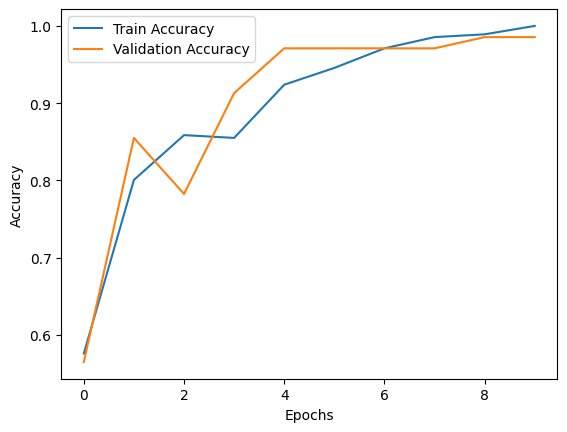

In [21]:
# Step 9: Plot Training Results
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
# Step 10: Evaluate Model
loss, acc = model.evaluate(val_ds)
print(f"✅ Validation Accuracy: {acc*100:.2f}%")


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.9810 - loss: 0.0778
✅ Validation Accuracy: 98.55%


In [23]:
# Step 11: Save Model
model.save("/content/drive/MyDrive/rice_leaf_model.h5")


In [26]:
import os

folder_path = "/content/drive/MyDrive/leaf dataset/Healthy Rice Leaf"
print(os.listdir(folder_path)[:10])  # shows first 10 files


['Bacterial Leaf Blight']


In [28]:
import os

folder_path = "/content/drive/MyDrive/leaf dataset/Healthy Rice Leaf/Bacterial Leaf Blight"
print(os.listdir(folder_path)[:10])  # shows first 10 files


['Bacterial_leaf_Blight  (45).jpg', 'Bacterial_leaf_Blight  (61).jpg', 'Bacterial_leaf_Blight  (40).jpg', 'Bacterial_leaf_Blight  (71).jpg', 'Bacterial_leaf_Blight  (63).jpg', 'Bacterial_leaf_Blight  (68).jpg', 'Bacterial_leaf_Blight  (30).jpg', 'Bacterial_leaf_Blight  (179).jpg', 'Bacterial_leaf_Blight  (56).jpg', 'Bacterial_leaf_Blight  (90).jpg']


In [29]:
img_path = "/content/drive/MyDrive/leaf dataset/Healthy Rice Leaf/Bacterial Leaf Blight/Bacterial_leaf_Blight  (45).jpg"

img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
print("Prediction:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Prediction: [[0.27794915 0.7220508 ]]


In [32]:
import random

folder_path = "/content/drive/MyDrive/leaf dataset/Healthy Rice Leaf/Bacterial Leaf Blight"
files = os.listdir(folder_path)

# pick one random image
random_file = random.choice(files)
img_path = os.path.join(folder_path, random_file)

print("Testing with:", img_path)

img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
print("Prediction:", prediction)


Testing with: /content/drive/MyDrive/leaf dataset/Healthy Rice Leaf/Bacterial Leaf Blight/Bacterial_leaf_Blight  (21).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction: [[0.2779937  0.72200626]]


In [36]:
import os

# Path to dataset
data_dir = "/content/drive/MyDrive/leaf dataset"
class_names = sorted(os.listdir(data_dir))  # ['Bacterial Leaf Blight', 'Healthy Rice Leaf']
print("Class Names:", class_names)


Class Names: ['Bacterial Leaf Blight', 'Healthy Rice Leaf']


In [37]:
class_names = ["Healthy Rice Leaf", "Bacterial Leaf Blight"]


Predicted Class: Bacterial Leaf Blight (72.19999694824219%)


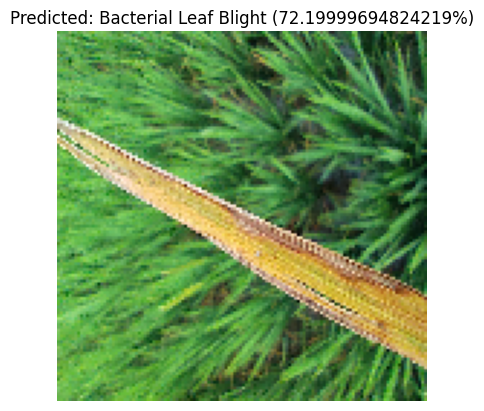

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# get predicted class index
predicted_class = np.argmax(prediction)
predicted_label = class_names[predicted_class]
confidence = round(100 * np.max(prediction), 2)

# show results
print(f"Predicted Class: {predicted_label} ({confidence}%)")

# plot the image with label
img_display = image.load_img(img_path, target_size=(128,128))
plt.imshow(img_display)
plt.title(f"Predicted: {predicted_label} ({confidence}%)")
plt.axis("off")
plt.show()
